# TODO:
1. Update aileron.stl to 4 separate aileron files that are placed in the correct positions, currently only one aileron is in correct position and all other Aileron.stl file placements overlap [DONE]
2. Test with two ailerons (left and right), see if they are in correct positions [DONE]
3. Define them as joints in rocket.urdf, apply changes to update_meshcat() as shown in Copilot Chat shown below [IP]
4. Test if these ailerons are controllable 
5. Add other 2 ailerons in following similar process, define them in ae353_zag.py file in meshcat_init() and meshcat_update()
6. Test if these ailerons are controllable


**Question**: if i define the aileron as joints, how can i control them if meshcat doesn't do any updates on it manually?

Great question!  
When you define the ailerons as joints in your URDF, **you control them through PyBullet, not Meshcat**.

### How it works:

- **PyBullet** simulates the physics and joint positions.
- **Meshcat** is just a visualizer. If you want Meshcat to show the ailerons moving, you must update their transforms in your `meshcat_update` method, using the joint states from PyBullet.

---

## How to Control Aileron Joints in PyBullet

1. **Set the joint positions in PyBullet:**
   ```python
   self.bullet_client.setJointMotorControl2(
       self.robot_id,
       jointIndex,  # index of the aileron joint
       self.bullet_client.POSITION_CONTROL,
       targetPosition=desired_angle
   )
   ```
   - You can get the joint indices by name using `getJointInfo`.

2. **Update Meshcat visualization:**
   - In your `meshcat_update` method, get the joint state from PyBullet:
     ```python
     joint_state = self.bullet_client.getJointState(self.robot_id, jointIndex)
     joint_angle = joint_state[0]
     ```
   - Use this angle to set the transform of the aileron mesh in Meshcat:
     ```python
     # Compute the transform for the aileron based on joint_angle
     self.vis['robot']['aileron-right'].set_transform(...)
     ```

---

## Summary Table

| What controls the joint? | How to update?                      |
|------------------------- |-------------------------------------|
| PyBullet                 | `setJointMotorControl2`             |
| Meshcat                  | Use joint state to set transform    |

---

**In short:**  
- PyBullet controls the joint angles.
- Meshcat only visualizes; you must update the transforms in your code using the joint angles from PyBullet.

Let me know if you want a code example for your specific setup!

In [2]:
# These modules are part of other existing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from sympy import *

# This is my own script (it is an interface to the pybullet simulator)
import rocket_424

simulator = rocket_424.Simulator(
    display=True,  # Whether or not to show the simulation window. The simulation will
    # run much faster if you do not show this window, so set display to
    # False if you want to run many simulations to collect results.
)

simulator.camera_catview()

argv[0]=
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7002/static/


In [3]:
class Controller:
    def __init__(self):
        pass
    def reset(self):
        pass

    def run(
        self,
        t,  # current time
        p_x,
        p_y,
        p_z,  # components of position (+z is down!)
        psi,
        theta,
        phi,  # yaw, pitch, and roll angles
        v_x,
        v_y,
        v_z,  # components of linear velocity in the body frame
        w_x,
        w_y,
        w_z,  # components of angular velocity in the body frame
    ):

        # FIXME: replace the following lines
        # x = np.array([p_y, psi, theta, phi, v_x, v_y, v_z, w_x, w_y, w_z])
        # x_d = -self.K @ x
        # delta_r = x_d[0]  # right elevon deflection angle (positive is down)
        # delta_l = x_d[1]  # left elevon deflection angle (positive is down)

        # Run the simulation with outputs from data provided by control algorithm from other file in Control
        delta_1 = 0.0
        delta_2 = 0.0
        delta_3 = 0.0
        delta_4 = 0.0
        return delta_1, delta_2, delta_3, delta_4

In [4]:
controller = Controller()
controller.reset()
simulator.reset(
    initial_conditions = {
        'p_x': 0.,
        'p_y': 0.,
        'p_z': 0.,
        'psi': 0.,
        'theta': -np.pi/2,
        'phi': 0.,
        'v_x': 0.,
        'v_y': 0.,
        'v_z': -1.,
        'w_x': 0.,
        'w_y': 0.,
        'w_z': 0.,
    }
)

# num_iterations = 50

# for i in range(num_iterations):
#     controller = Controller(Q, R)
#     simulator.reset()
#     data = simulator.run(controller, maximum_time=25.0)
#     has_landed = simulator.has_landed()
#     if has_landed:
#         print(f"Iteration {i}: The aircraft landed.")
#         break
#     else:
#         print(f"Iteration {i}: The aircraft did not land.")

data = simulator.run(
    controller,  # <-- required (an instance of your Controller class)
    maximum_time=5.0,  # <-- optional (how long you want to run the simulation in seconds)
    data_filename=None,  # <-- optional (save data to this file, e.g., 'my_data.json')
    video_filename=None,  # <-- optional (save video to this file, e.g., 'my_video.mov')
)

KeyError: 'delta_r'

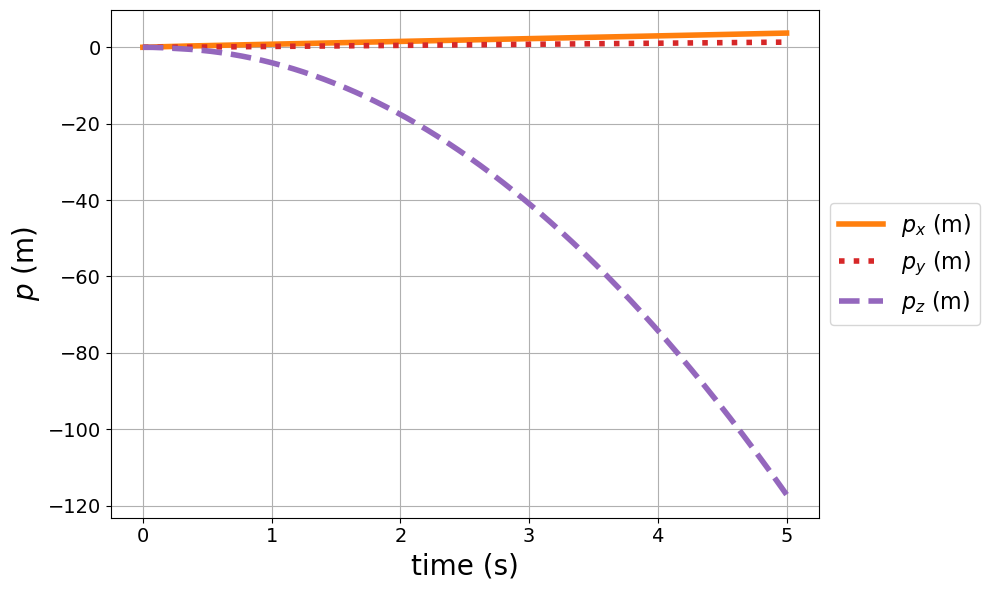

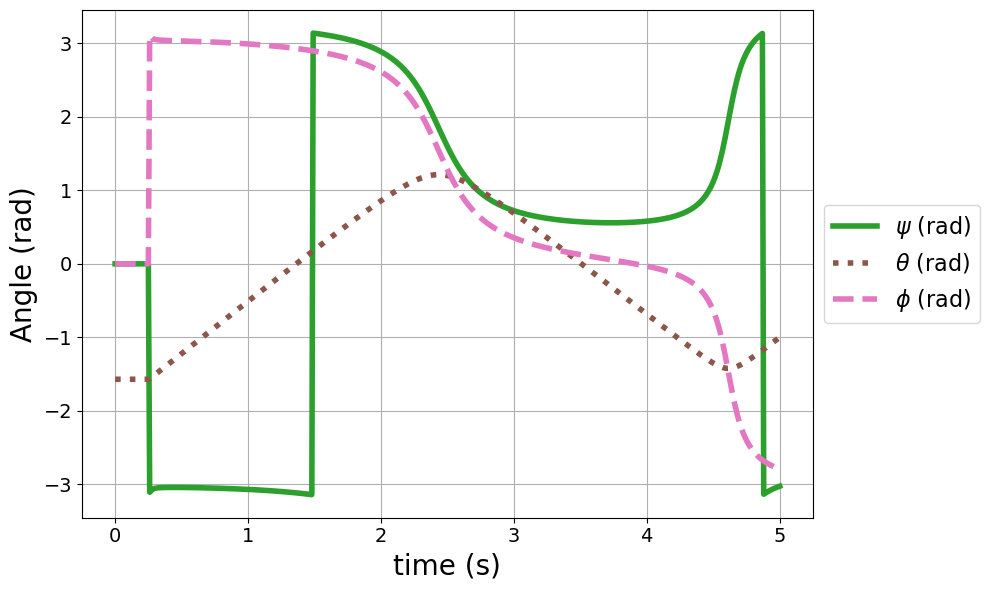

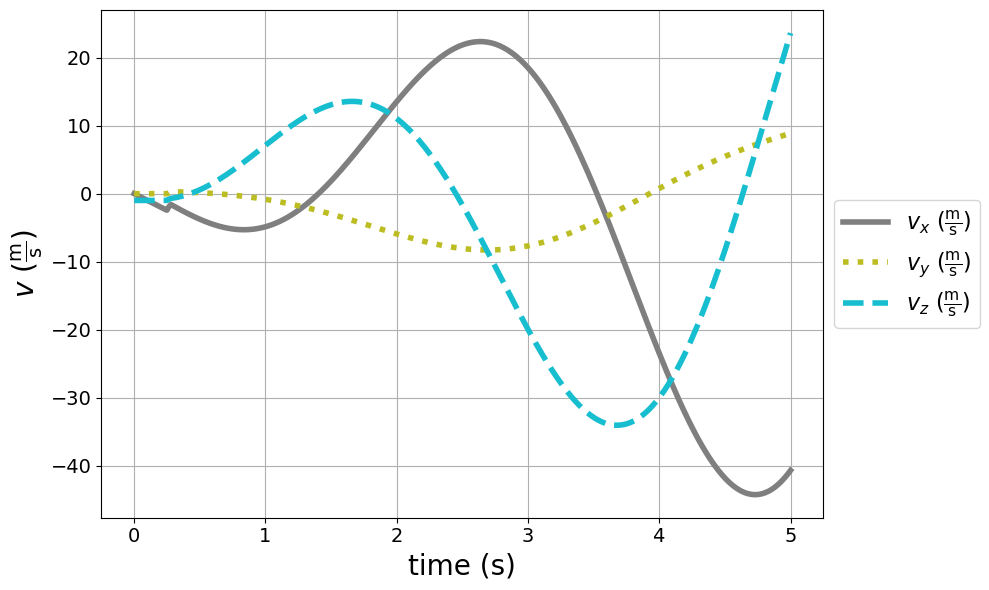

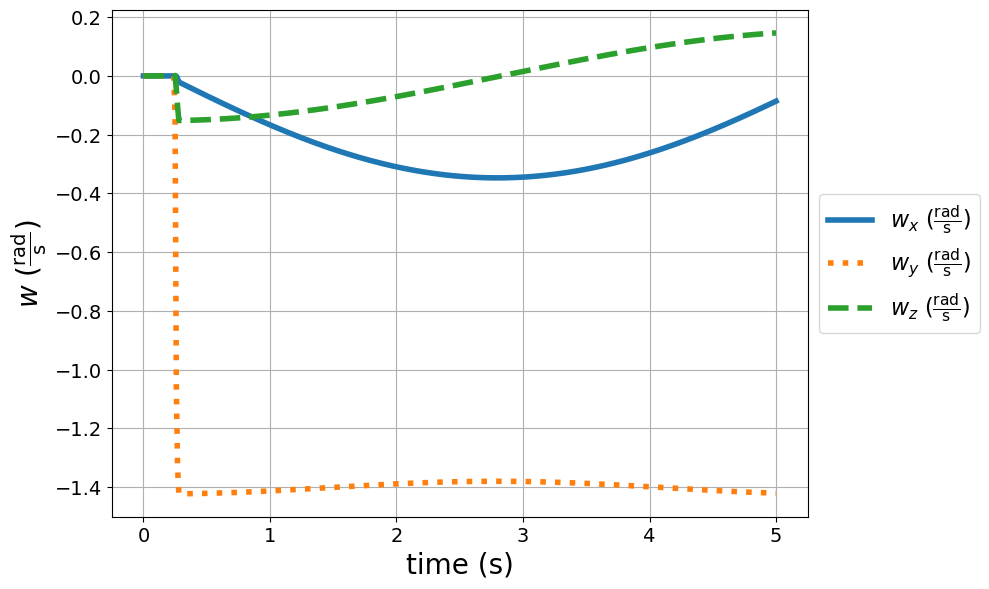

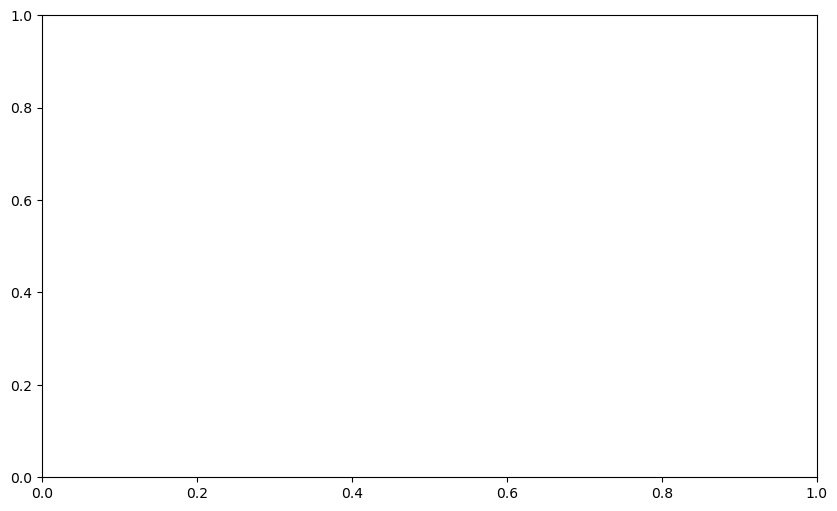

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming data is a dictionary containing your data
# Example: data = {"t": ..., "p_x": ..., "p_y": ..., "p_z": ..., "psi": ..., "theta": ..., "phi": ..., "v_x": ..., "v_y": ..., "v_z": ..., "w_x": ..., "w_y": ..., "w_z": ..., "delta_r": ..., "delta_l": ...}

# Plot position
fig_pos, ax_pos = plt.subplots(figsize=(10, 6))
ax_pos.plot(data["t"], data["p_x"], label="$p_x$ (m)", linewidth=4, color="C1", linestyle="solid")
ax_pos.plot(data["t"], data["p_y"], label="$p_y$ (m)", linewidth=4, color="C3", linestyle="dotted")
ax_pos.plot(data["t"], data["p_z"], label="$p_z$ (m)", linewidth=4, color="C4", linestyle="--")
ax_pos.grid()
ax_pos.set_ylabel("$p$ (m)", fontsize=20)
ax_pos.set_xlabel("time (s)", fontsize=20)
ax_pos.legend(fontsize=16, loc="center left", bbox_to_anchor=(1, 0.5))
ax_pos.tick_params(labelsize=14)
fig_pos.tight_layout()
fig_pos.savefig("position_plot.png", facecolor="white", transparent=False)

# Plot orientation
fig_ori, ax_ori = plt.subplots(figsize=(10, 6))
ax_ori.plot(data["t"], data["psi"], label="$\\psi$ (rad)", linewidth=4, color="C2", linestyle="solid")
ax_ori.plot(data["t"], data["theta"], label="$\\theta$ (rad)", linewidth=4, color="C5", linestyle="dotted")
ax_ori.plot(data["t"], data["phi"], label="$\\phi$ (rad)", linewidth=4, color="C6", linestyle="--")
ax_ori.grid()
ax_ori.set_ylabel("Angle (rad)", fontsize=20)
ax_ori.set_xlabel("time (s)", fontsize=20)
ax_ori.legend(fontsize=16, loc="center left", bbox_to_anchor=(1, 0.5))
ax_ori.tick_params(labelsize=14)
fig_ori.tight_layout()
fig_ori.savefig("orientation_plot.png", facecolor="white", transparent=False)

# Plot linear velocity
fig_linvel, ax_linvel = plt.subplots(figsize=(10, 6))
ax_linvel.plot(data["t"], data["v_x"], label="$v_x\\ (\\frac {\\text{m}} {\\text{s}})$", linewidth=4, color="C7", linestyle="solid")
ax_linvel.plot(data["t"], data["v_y"], label="$v_y\\ (\\frac {\\text{m}} {\\text{s}})$", linewidth=4, color="C8", linestyle="dotted")
ax_linvel.plot(data["t"], data["v_z"], label="$v_z\\ (\\frac {\\text{m}} {\\text{s}})$", linewidth=4, color="C9", linestyle="--")
ax_linvel.grid()
ax_linvel.set_ylabel("$v\\ (\\frac {\\text{m}} {\\text{s}})$", fontsize=20)
ax_linvel.set_xlabel("time (s)", fontsize=20)
ax_linvel.legend(fontsize=16, loc="center left", bbox_to_anchor=(1, 0.5))
ax_linvel.tick_params(labelsize=14)
fig_linvel.tight_layout()
fig_linvel.savefig("linear_velocity_plot.png", facecolor="white", transparent=False)

# Plot angular velocity
fig_angvel, ax_angvel = plt.subplots(figsize=(10, 6))
ax_angvel.plot(data["t"], data["w_x"], label="$w_x\\ (\\frac {\\text{rad}} {\\text{s}})$", linewidth=4, color="C10", linestyle="solid")
ax_angvel.plot(data["t"], data["w_y"], label="$w_y\\ (\\frac {\\text{rad}} {\\text{s}})$", linewidth=4, color="C11", linestyle="dotted")
ax_angvel.plot(data["t"], data["w_z"], label="$w_z\\ (\\frac {\\text{rad}} {\\text{s}})$", linewidth=4, color="C12", linestyle="--")
ax_angvel.grid()
ax_angvel.set_ylabel("$w\\ (\\frac {\\text{rad}} {\\text{s}})$", fontsize=20)
ax_angvel.set_xlabel("time (s)", fontsize=20)
ax_angvel.legend(fontsize=16, loc="center left", bbox_to_anchor=(1, 0.5))
ax_angvel.tick_params(labelsize=14)
fig_angvel.tight_layout()
fig_angvel.savefig("angular_velocity_plot.png", facecolor="white", transparent=False)

# Plot elevon deflection angles
fig_delta, ax_delta = plt.subplots(figsize=(10, 6))
ax_delta.plot(data["t"], data["delta_r"], label="$\\delta_r$ (rad)", linewidth=4, color="C16", linestyle="solid")
ax_delta.plot(data["t"], data["delta_l"], label="$\\delta_l$ (rad)", linewidth=4, color="C15", linestyle="--")
ax_delta.plot(data["t"], -np.ones_like(data["t"]) * simulator.maximum_elevon_deflection, ":", linewidth=4, color="C4", zorder=0, label="Max deflection")
ax_delta.plot(data["t"], np.ones_like(data["t"]) * simulator.maximum_elevon_deflection, ":", linewidth=4, color="C4", zorder=0)
ax_delta.grid()
ax_delta.set_ylabel("$\\delta$ (rad)", fontsize=20)
ax_delta.set_xlabel("time (s)", fontsize=20)
ax_delta.legend(fontsize=16, loc="center left", bbox_to_anchor=(1, 0.5))
ax_delta.tick_params(labelsize=14)
ax_delta.set_ylim(-1.2 * simulator.maximum_elevon_deflection, 1.2 * simulator.maximum_elevon_deflection)
fig_delta.tight_layout()
fig_delta.savefig("elevon_deflection_plot.png", facecolor="white", transparent=False)